#### import

In [182]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [160]:
mnist_raw = loadmat("../mnist-original.mat")

In [161]:
print(mnist_raw.keys())

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])


In [162]:
mnist = {"data": mnist_raw["data"].T, "label": mnist_raw["label"][0]}
num_images, num_pixels = mnist["data"].shape
print("จำนวนภาพในชุดข้อมูล MNIST:", num_images)
print("จำนวนพิกเซลในแต่ละภาพ:", num_pixels)


จำนวนภาพในชุดข้อมูล MNIST: 70000
จำนวนพิกเซลในแต่ละภาพ: 784


In [163]:
print(mnist["data"].shape)
print(mnist["data"])

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [164]:
print(mnist["label"].shape)
print(mnist["label"])

(70000,)
[0. 0. 0. ... 9. 9. 9.]


#### training & testing set

In [165]:
x, y = mnist["data"], mnist["label"]

In [166]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [167]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [168]:
# ทำให้ data เป็น true false เพื่อบอกว่าเป็น 0 หรือ ไม่
predict_number = 1000
y_train_0 = y_train == 0
y_test_0 = y_test == 0

In [169]:
print(y_test, y_test_0)

[0. 0. 0. ... 9. 9. 9.] [ True  True  True ... False False False]


In [170]:
sgd_clf = SGDClassifier()

In [171]:
sgd_clf.fit(x_train, y_train_0)

SGDClassifier()

In [172]:
def displayImage(x):
    plt.imshow(x.reshape(28, 28), cmap=plt.cm.gray, interpolation="nearest")
    plt.show()

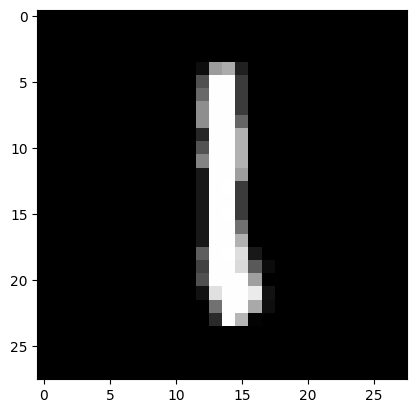

In [173]:
displayImage(x_test[predict_number])

In [174]:
def displayPredict(clf, actually_y, x):
    print("Actually =", actually_y)
    print("Predict =", clf.predict(x.reshape(1, -1)))

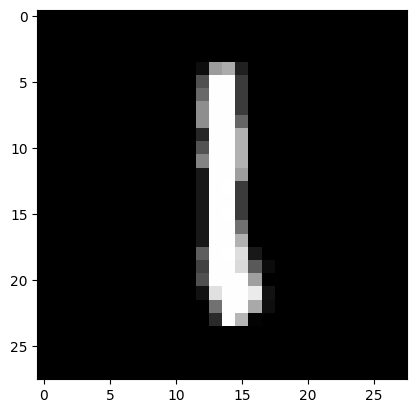

Actually = False
Predict = [False]


In [175]:
displayImage(x_test[predict_number])
displayPredict(sgd_clf, y_test_0[predict_number], x_test[predict_number])

#### cross validation score

In [178]:
score = cross_val_score(sgd_clf, x_train, y_train_0,cv = 3, scoring="accuracy")

In [180]:
print(score)

[0.98245 0.9317  0.9638 ]
